<a href="https://colab.research.google.com/github/MRobalinho/Using_colab_research_Google/blob/master/Upload_Local_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uploading files from your local file system

files.upload returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name, the value is the data which was uploaded.

In [0]:
# Uploading files from your local file system

# We import an excel file from the local system. The system open an input line to select the file to import.
# The system put the file temporarily in the cloud and we can access the file with no path.
# This example impor file: paises-do-mundo.xls

In [10]:
import os
import sys
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']


In [20]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving paises-do-mundo.xls to paises-do-mundo.xls
User uploaded file "paises-do-mundo.xls" with length 801888 bytes


In [24]:
# Install new packages
!pip install xlrd

    100% |████████████████████████████████| 112kB 4.2MB/s 


In [0]:
# Import packages
import pandas as pd
import xlrd
import numpy as np

In [26]:
file = 'paises-do-mundo.xls'
df_world = pd.read_excel(file)
df_world.head()

,País/território,População,Área em Km2,Densidade,Continente,Região,Capital,Maior cidade,PIB PPC,PIB nominal,...,Pequeno país?,Insular?,Transcontinental?,Prêmios Nobel,Medalhas olímpicas,União Europeia,Zona do euro,Patrimônios da Unesco,1000 lugares,URL Wikipedia
0,Açores,245746.0,2333.0,105.334762,África,Norte da África,Ponta Delgada,NaN,NaN,NaN,...,NaN,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://pt.wikipedia.org/wiki/A%C3%A7ores
1,Acrotiri e Deceleia,NaN,254.0,0.000000,Europa,Europa meridional,Episcópi,Episcópi,NaN,NaN,...,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://pt.wikipedia.org/wiki/Acrot%C3%ADri_e_...
2,Afeganistão,27657145.0,652090.0,42.413079,Ásia,Ásia meridional,Cabul,Cabul,67681.0,21122.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,https://pt.wikipedia.org/wiki/Afeganist%C3%A3o
3,África do Sul,55908000.0,1221037.0,45.787310,África,África austral,Pretória,Joanesburgo,758123.0,349819.0,...,NaN,NaN,NaN,10.0,70.0,NaN,NaN,8.0,8.0,https://pt.wikipedia.org/wiki/%C3%81frica_do_Sul
4,Albânia,2886026.0,28748.0,100.390497,Europa,Europa meridional,Tirana,Tirana,36241.0,13413.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,https://pt.wikipedia.org/wiki/Alb%C3%A2nia


In [52]:
x_1 = df_world.copy()
x_2 = df_world.groupby('Continente')['População','Área em Km2','PIB PPC'].sum()
x_3 = pd.DataFrame(x_2)
x_3.População = x_3.População / 1000000
x_3

,População,Área em Km2,PIB PPC
Continente,,,
América,992.482448,42045680.00,31051064.0
Antártida,0.000000,14000000.00,0.0
Europa,828.719287,23626321.24,26594817.0
Oceania,40.591342,8513643.00,1451648.0
África,1201.945798,30335489.00,6162818.0
Ásia,4408.617601,31797490.00,60587427.0


In [0]:
# Rename column in a Dataframe

x_3=x_3.rename(columns = {'População':'Population'})
x_3=x_3.rename(columns = {'Área em Km2':'Area_Km2'})
x_3=x_3.rename(columns = {'PIB PPC':'PIB_PPC'})

In [0]:

# https://matplotlib.org/examples/color/named_colors.html
# List of colors
color_list = ['red', 'tomato', 'lightsalmon', 'magenta','deepskyblue','palegreen',
'plum','cyan', 'darkorange','wheat','seashell',
'linen','aliceblue','azure','mintcream', 'oldlace',
'floralwhite','honeydew','cornsilk','lightyellow','whitesmoke',
'lavender','lightcyan','white','ghostwhite','snow',
'oldlace','oldlace','oldlace','oldlace']

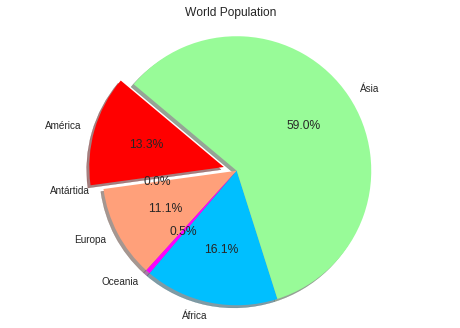

In [55]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = x_3.index
sizes = x_3.Population
colors = [color_list[0], color_list[1], color_list[2], color_list[3],color_list[4],color_list[5]]
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('World Population')
plt.axis('equal')
plt.show()

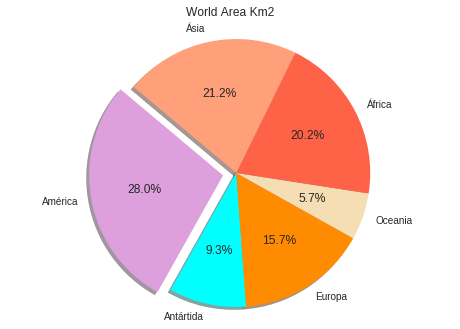

In [57]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = x_3.index
sizes = x_3.Area_Km2
colors = [color_list[6], color_list[7], color_list[8], color_list[9],color_list[1],color_list[2]]
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('World Area Km2')
plt.axis('equal')
plt.show()

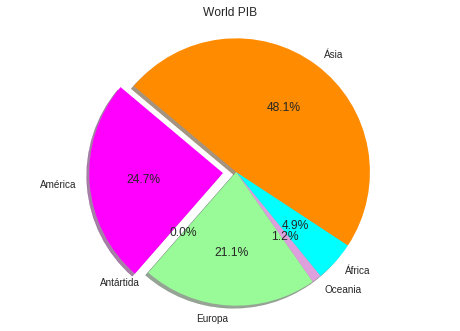

In [58]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = x_3.index
sizes = x_3.PIB_PPC
colors = [color_list[3], color_list[4], color_list[5], color_list[6],color_list[7],color_list[8]]
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('World PIB')
plt.axis('equal')
plt.show()

# Downloading files to your local file system
files.download will invoke a browser download of the file to the user's local computer.

In [0]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content for Test MRobalinho')

files.download('example.txt')